## Analyse du diffractogramme du $Ca_2BrN$ (Cu Kα)

Quentin Bodart - 70362100

### Importations de données

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

mp_key = "cLLBrCi8gU7SqhnPKS4NJqSKB4Y6d0gD"
mp_id = "mp-23009"

with MPRester(mp_key) as m: structure = m.get_structure_by_material_id(mp_id)
    
# Création d'un calculateur de diffraction pour un rayonnement Cu Kα (λ = 1.54060 Å)
xrd_calc = XRDCalculator(wavelength=1.54060)
pattern = xrd_calc.get_pattern(structure)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Trois premiers pics

In [6]:
print("Les 3 premiers pics du diffractogramme et leurs indices hkl associés (intensité normalisée à 100):\n")
for i in range(3):
    two_theta = pattern.x[i]
    intensity = pattern.y[i]
    hkls = pattern.hkls[i]
    
    print(f"Pic {i+1}: 2θ = {two_theta:.2f}°, intensité = {intensity:.2f}")
    for hkl_data in hkls:
        indices = hkl_data["hkl"]
        mult = hkl_data["multiplicity"]
        print(f"Indices hkl : {indices}, multiplicité : {mult}")
    print("")

Les 3 premiers pics du diffractogramme et leurs indices hkl associés (intensité normalisée à 100):

Pic 1: 2θ = 12.89°, intensité = 8.38
Indices hkl : (1, 1, 1), multiplicité : 2

Pic 2: 2θ = 25.94°, intensité = 4.42
Indices hkl : (2, 2, 2), multiplicité : 2

Pic 3: 2θ = 28.09°, intensité = 35.89
Indices hkl : (1, 0, 0), multiplicité : 6



L'intensité d'un pic est proportionnelle à la multiplicité du plan associé (nombre de plans équivalents) et inversement proportionnelle à θ (facteur de forme).  
On a donc un premier et deuxième pic à intensité relativement faible, vu leur multiplicité, et le deuxième est légèrement plus faible que le premier dû au facteur de forme atomique.  
Le troisième est bien plus fort, ayant une multiplicité trois fois supérieure.


### Graphe

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

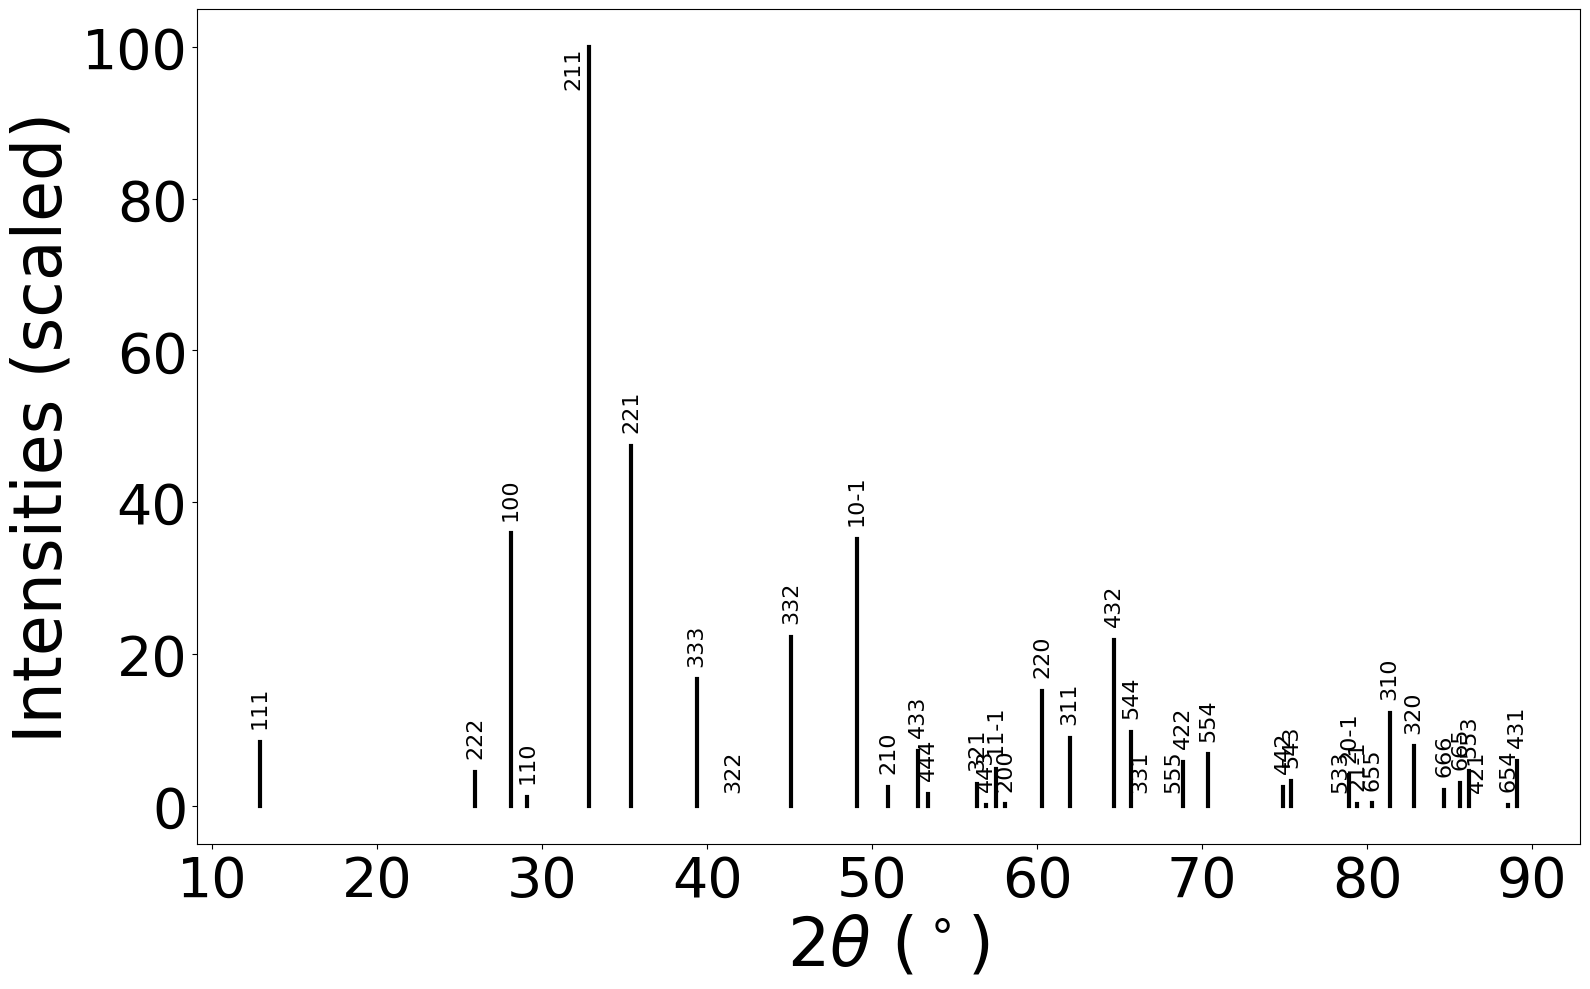

In [3]:
xrd_calc.get_plot(structure)

Ces données concordent bien avec le graphique donné par "*The Materials Project*"
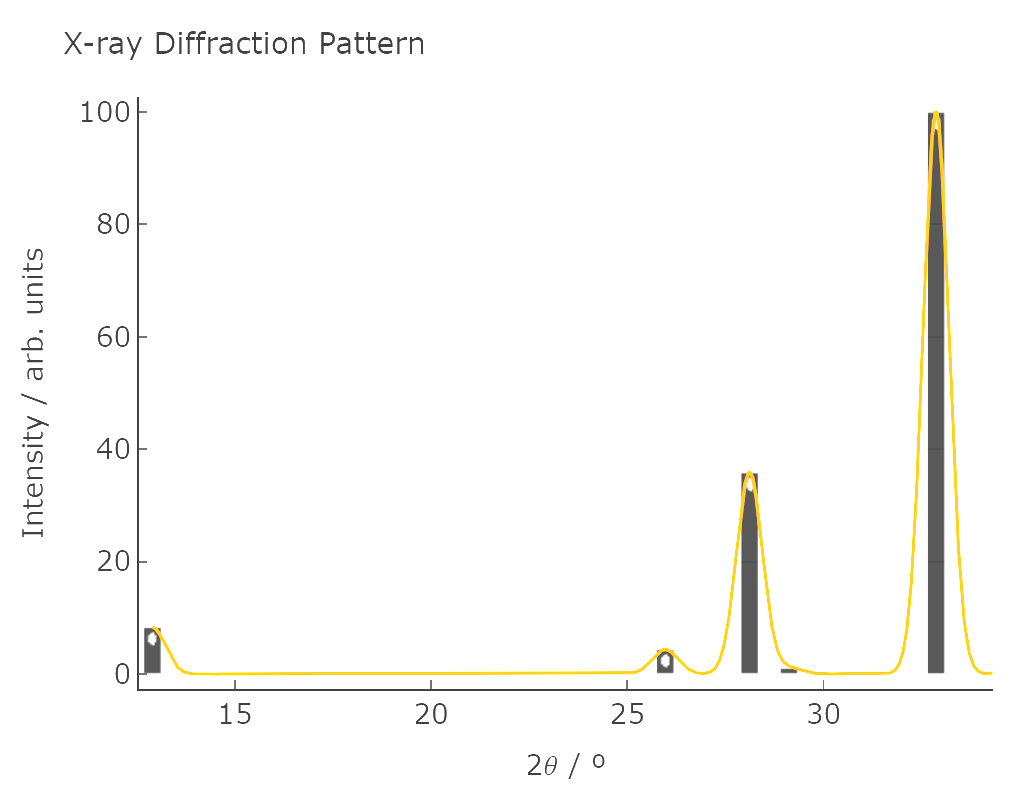